## Student Admission Prediction
What You’ll Learn (Skills)

- Logistic Regression from scratch
- Sigmoid function
- Decision boundary
- Regularization
- Confusion matrix & metrics
- Binary classification intuition

# import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [3]:
data = np.loadtxt("admission_data.txt", delimiter=",")

X = data[:, :2]     # Exam scores
y = data[:, 2]      # Admission (0 or 1)

m = len(y)

# Feature Scaling

In [4]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

#Sigmoid Function


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Logistic Regression Model
**fw​(x)=σ(wTx+b)**

In [6]:
def predict_proba(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

# Cost Function
**J(w,b)=−m1​∑[ylog(h)+(1−y)log(1−h)]**

In [7]:
def compute_cost(X, y, w, b):
    m = len(y)
    h = predict_proba(X, w, b)
    cost = (-1/m) * np.sum(
        y * np.log(h + 1e-8) + (1 - y) * np.log(1 - h + 1e-8)
    )
    return cost


# Gradient Descent

In [8]:
def gradient_descent(X, y, w, b, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = predict_proba(X, w, b)

        dw = (1/m) * np.dot(X.T, (h - y))
        db = (1/m) * np.sum(h - y)

        w -= alpha * dw
        b -= alpha * db

        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return w, b, cost_history

# Train the Model

In [9]:
w = np.zeros(X.shape[1])
b = 0

alpha = 0.1
iterations = 1000

w, b, cost_history = gradient_descent(X, y, w, b, alpha, iterations)

Iteration 0: Cost = 0.6806
Iteration 100: Cost = 0.3308
Iteration 200: Cost = 0.2841
Iteration 300: Cost = 0.2673
Iteration 400: Cost = 0.2590
Iteration 500: Cost = 0.2543
Iteration 600: Cost = 0.2513
Iteration 700: Cost = 0.2494
Iteration 800: Cost = 0.2480
Iteration 900: Cost = 0.2469


# Decision Boundary
Decision boundary occurs when:

**wTx+b=0**




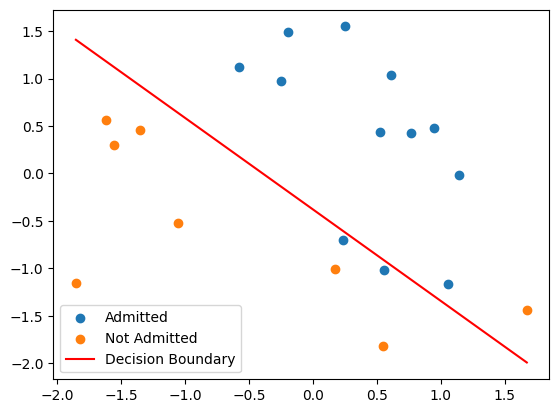

In [10]:
x_vals = np.array([X[:,0].min(), X[:,0].max()])
y_vals = -(w[0]*x_vals + b) / w[1]

plt.scatter(X[y==1][:,0], X[y==1][:,1], label="Admitted")
plt.scatter(X[y==0][:,0], X[y==0][:,1], label="Not Admitted")
plt.plot(x_vals, y_vals, color='red', label="Decision Boundary")

plt.legend()
plt.show()

# Predictions

In [11]:
def predict(X, w, b):
    probs = predict_proba(X, w, b)
    return (probs >= 0.5).astype(int)

y_pred = predict(X, w, b)

# Confusion Matrix


In [12]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

TP, TN, FP, FN = confusion_matrix(y, y_pred)

print("TP:", TP, "TN:", TN, "FP:", FP, "FN:", FN)

TP: 10 TN: 7 FP: 1 FN: 2


# Evaluation Metrics

In [13]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP + 1e-8)
recall = TP / (TP + FN + 1e-8)
f1 = 2 * (precision * recall) / (precision + recall + 1e-8)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.85
Precision: 0.9090909082644627
Recall: 0.8333333326388889
F1 Score: 0.8695652116446124


# Regularization (L2)
Regularized Cost:

**J=J+2mλ​∑w2**

In [14]:
def compute_cost_reg(X, y, w, b, lambda_):
    cost = compute_cost(X, y, w, b)
    reg = (lambda_ / (2 * len(y))) * np.sum(w ** 2)
    return cost + reg